In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("selected_M_best20.csv")

In [3]:
X = data.values[:,:-1]
y = data.values[:,-1:]

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
acc = cross_val_score(rf, X, y.ravel(), cv=5)
print("Accuracy RF: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
acc = cross_val_score(svm, X, y.ravel(), cv=5)
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
acc = cross_val_score(knn, X, y.ravel(), cv=5)
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF: 0.97 (+/- 0.10)
Accuracy SVM: 0.93 (+/- 0.20)
Accuracy KNN: 0.82 (+/- 0.20)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
def check_performance(y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(report)
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [10]:
param_grid_rf = {
     'max_depth': [80, 90, 100, 110],
     'max_features': [2, 3],
     'n_estimators': [100, 200, 300]
}
param_grid_svc = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
param_grid_knn = {
    'n_neighbors':[i for i in range(1,15)]
}

{'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



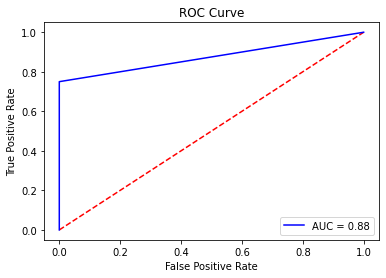

In [11]:
gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=5)
gridSearchRF.fit(X_train, y_train.ravel())
print(gridSearchRF.best_params_)
y_pred = gridSearchRF.predict(X_test)
check_performance(y_test, y_pred)

In [12]:
y_pred

array([0., 0., 1., 0., 1., 1., 0., 0.])

In [13]:
h = gridSearchRF.cv_results_
h.get('mean_test_score').mean()

0.963888888888889

In [14]:
h.get('std_test_score').mean()

0.06791524928550881

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         4
         1.0       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



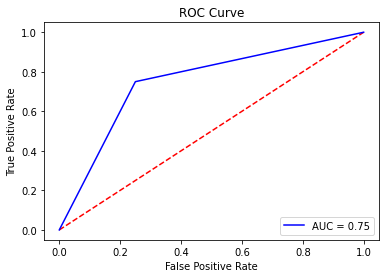

In [15]:
gridSearchSVM = GridSearchCV(estimator=svm, param_grid=param_grid_svc, scoring='accuracy', n_jobs=-1, cv=5)
gridSearchSVM.fit(X_train, y_train.ravel())
print(gridSearchSVM.best_params_)
y_pred = gridSearchSVM.predict(X_test)
check_performance(y_test, y_pred)

{'n_neighbors': 13}
              precision    recall  f1-score   support

         0.0       0.50      0.75      0.60         4
         1.0       0.50      0.25      0.33         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8



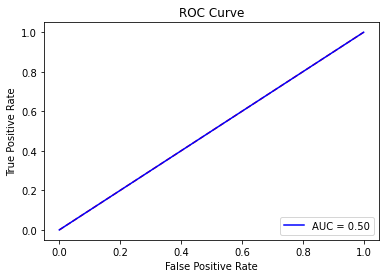

In [16]:
gridSearchKNN = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=5)
gridSearchKNN.fit(X_train, y_train.ravel())
print(gridSearchKNN.best_params_)
y_pred = gridSearchKNN.predict(X_test)
check_performance(y_test, y_pred)